## 필수과제 
- hotel_booking 캔슬 예측
 1. 피처에 대한 EDA를 통해 y값과 중요한 피처들이 무엇이 있는지 확인하는 코드!
 2. 각 피처별로 관계를 통해 피처엔지니어링 할 수 있는 부분은 무엇이 있는지?
- 단 논리적으로 설명할 수 있어야 한다. (y값의 관계 등),
 3. 먼저 1차 피처 선정한 후에 베이스 모델을 돌려서 성능이 얼마인지 확인
- 해당 성능이 디폴트로 우리가 올려야 하는 값\n",
4. 피처셀렉션을 이용해서, 피처 선택 후 동일 한 모델로 성능이 얼마나 개선되었는지?
- 위에 3번 보다는 최대한 성능이 올라갈 수 있도록!!
5. 모델에 대한 변환, 튜닝을 통해서 성능을 더 끌어올리는 것
- 위에 4번 보다 더 높은 성능이 나와야 합니다.
- 가장 중요하게 봐야 하는 것은 피처에 대한 이해도를 통해 EDA로 관계를 잘 이해하고 전처리를 진행해 주세요.

### EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('hotel_booking.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [7]:
df['children'] = df['children'].fillna(0)
df['country'] = df['country'].fillna('Unknown')

In [9]:
df.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               0
babies                                 0
meal                                   0
country                                0
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

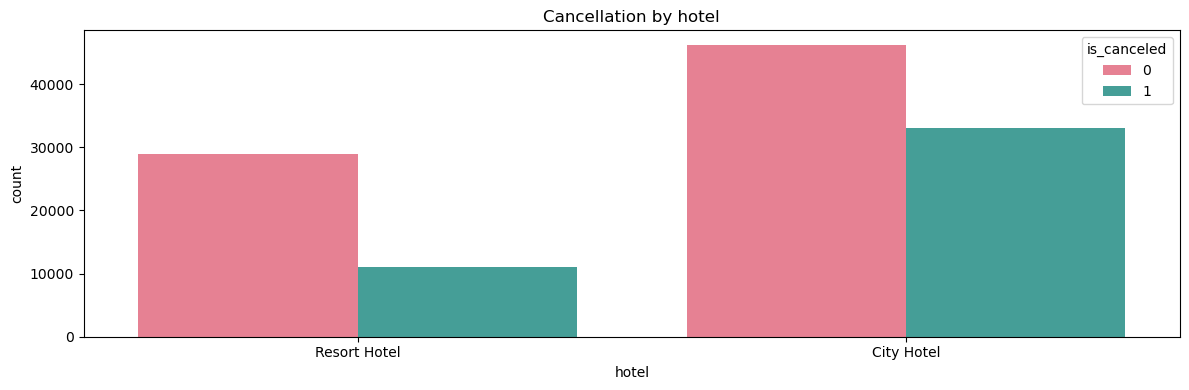

<Figure size 1200x400 with 0 Axes>

<Figure size 1200x400 with 0 Axes>

<Figure size 1200x400 with 0 Axes>

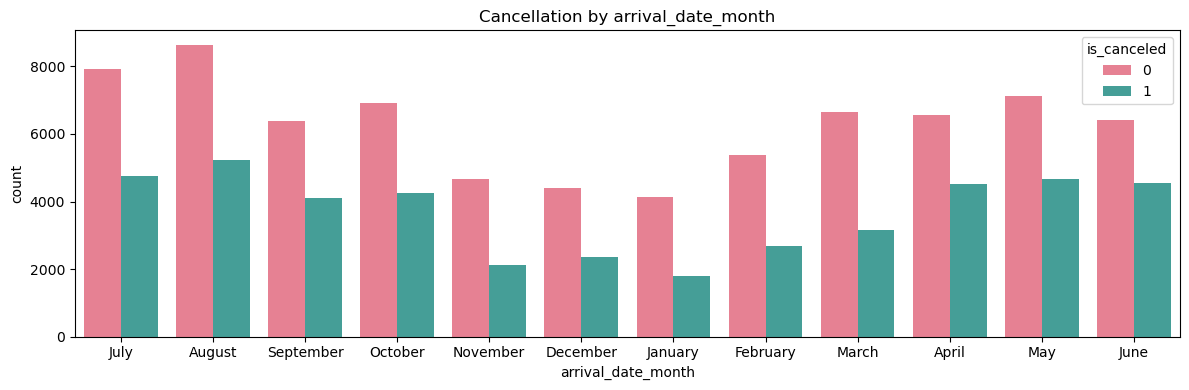

<Figure size 1200x400 with 0 Axes>

<Figure size 1200x400 with 0 Axes>

<Figure size 1200x400 with 0 Axes>

<Figure size 1200x400 with 0 Axes>

<Figure size 1200x400 with 0 Axes>

<Figure size 1200x400 with 0 Axes>

<Figure size 1200x400 with 0 Axes>

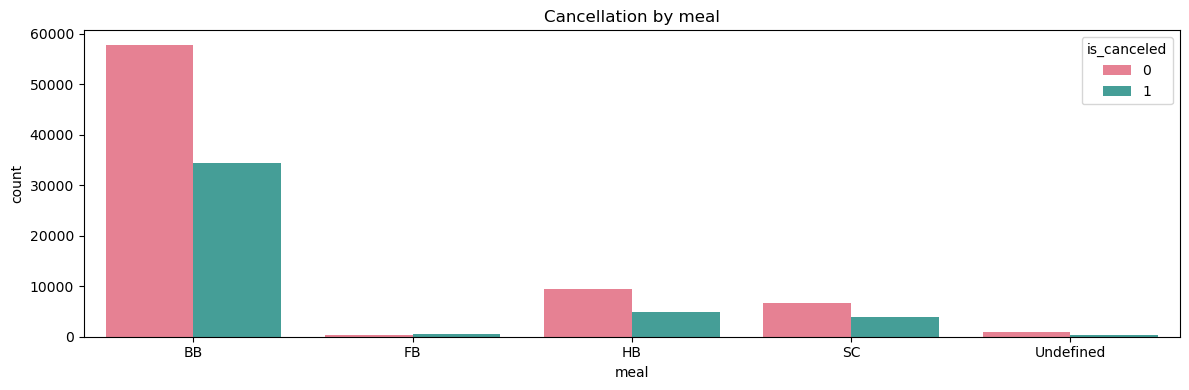

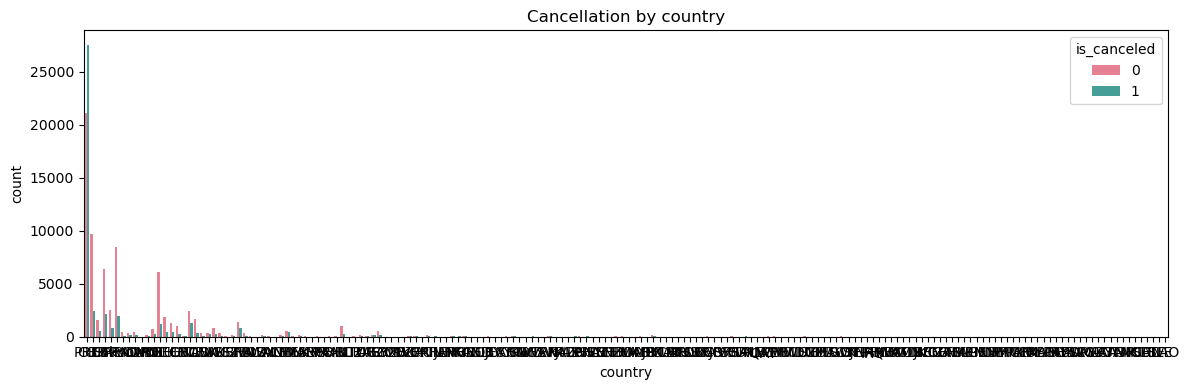

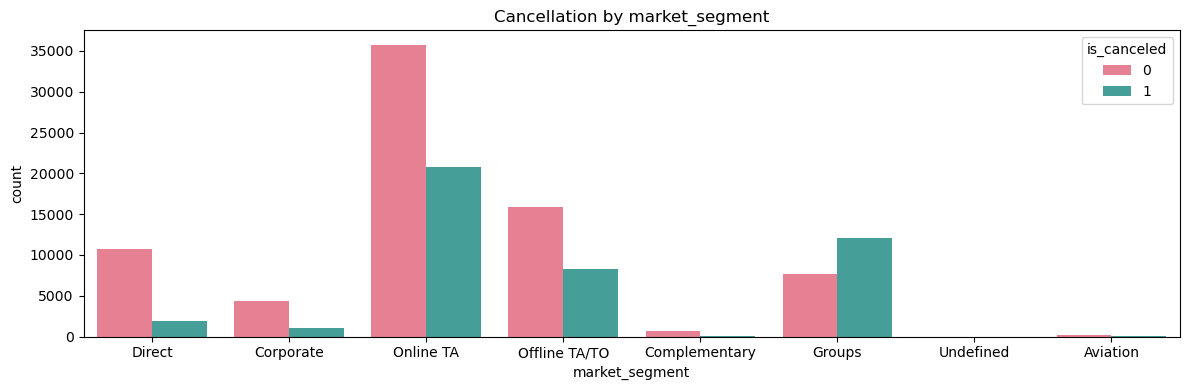

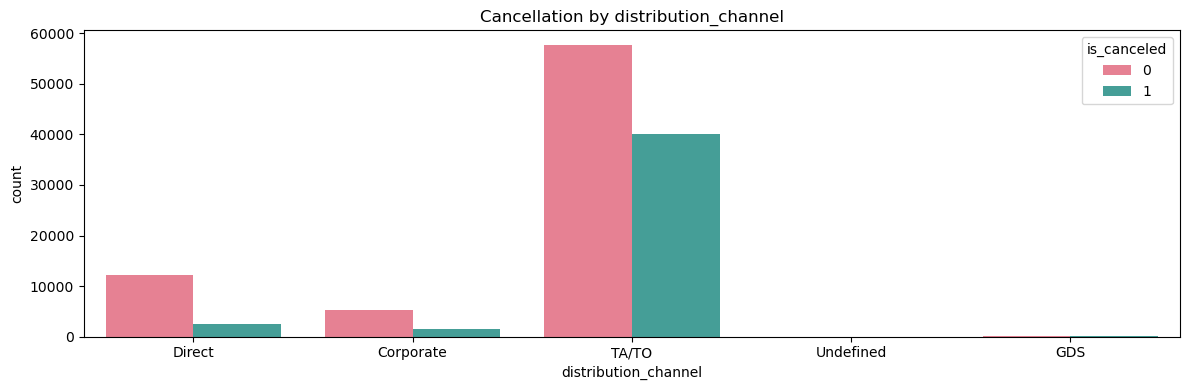

<Figure size 1200x400 with 0 Axes>

<Figure size 1200x400 with 0 Axes>

<Figure size 1200x400 with 0 Axes>

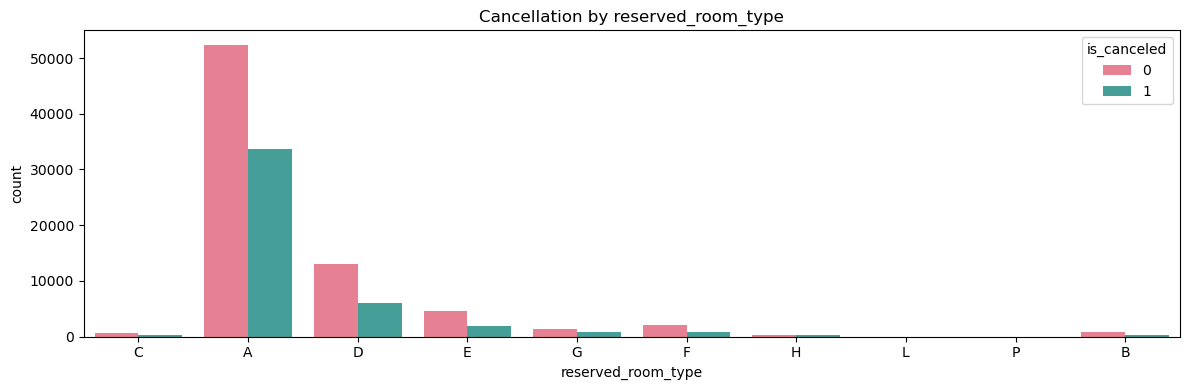

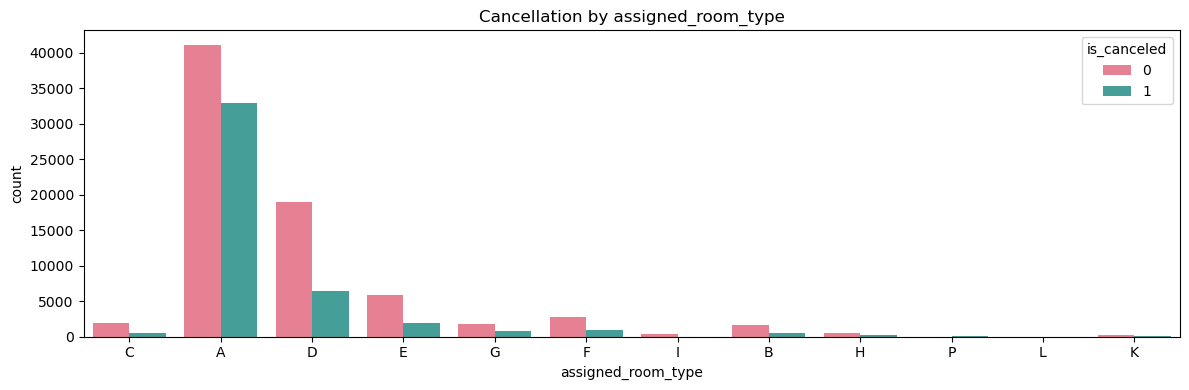

<Figure size 1200x400 with 0 Axes>

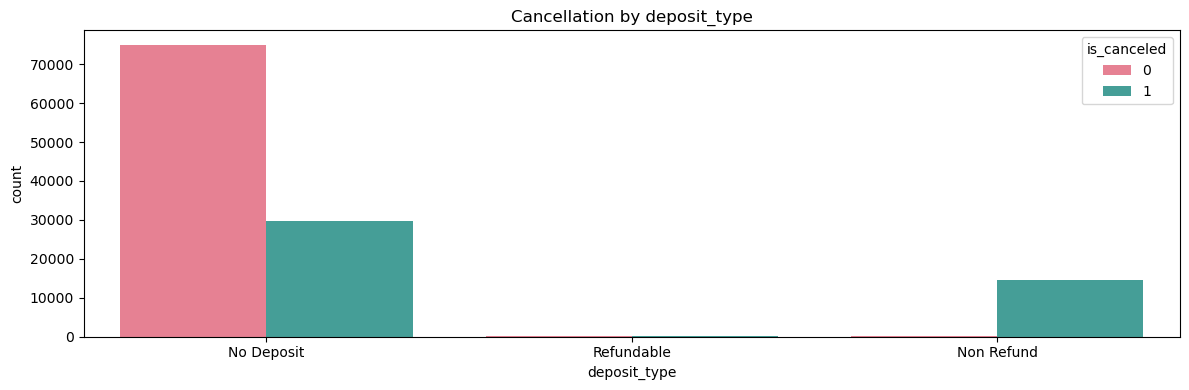

<Figure size 1200x400 with 0 Axes>

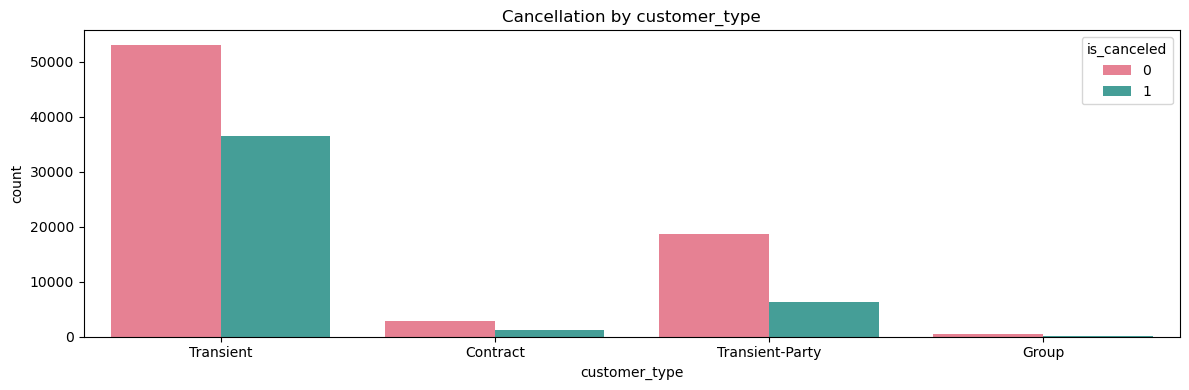

<Figure size 1200x400 with 0 Axes>

<Figure size 1200x400 with 0 Axes>

<Figure size 1200x400 with 0 Axes>

In [11]:
df_rvs = df.iloc[:,:-6] # 날짜, 이름, 이메일, 전화번호, 신용카드 번호 제외
df_rvs = df_rvs.drop(['agent','company'], axis=1)

for col in df_rvs.columns:
    plt.figure(figsize=(12,4))

    if df_rvs[col].dtype == 'object':
        sns.countplot(x=col, hue='is_canceled', data=df_rvs, palette='husl')
        plt.title(f'Cancellation by {col}')

    plt.tight_layout()
    plt.show()

- Hotel : City Hotel 일 경우 취소 고객이 증가함
- Arrival Date : 2~3분기일 경우 거래량이 증가하며 취소 고객이 증가함
- Meal : Bed & Breakfast 만 포함된 경우 취소 고객이 많으며, 전체 식사가 제공되는 FB의 경우, 취소 고객이 훨씬 더 많음
- Market Segment : Online TA 거래량이 가장 많아 취소 고객도 많았으며, Groups 의 경우 취소 고객이 미취소 고객보다 훨씬 많음
- Distribution Channel : TA/TO (Travel Agent, Tour Operator) 채널의 취소 고객이 가장 많음
- Room Type : A type 방 유형이 예약과 배정 모두 취소 고객이 많음
- Deposit Type : 환불이 안 될 경우, 취소 고객이 많음
- Customer Type : Transient (일시적) 고객 유형이 가장 많으며 취소 고객도 해당 유형이 가장 많음

### 기본 베이스 모델

In [13]:
features = [col for col in df_rvs.columns if df_rvs[col].dtype=='object']
df_rvs = pd.get_dummies(df_rvs, columns=features, drop_first=True)
df_rvs = df_rvs.astype('float')

In [15]:
from sklearn.model_selection import train_test_split

X = df_rvs.drop('is_canceled', axis=1)
y = df_rvs.iloc[:,0]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

dt_clf = DecisionTreeClassifier(random_state=1)
dt_clf.fit(X_train, y_train)

dt_pred = dt_clf.predict(X_test)
dt_acc = accuracy_score(y_test, dt_pred)
dt_rep = classification_report(y_test, dt_pred)

print('DT Accuracy :', dt_acc)
print(dt_rep)

DT Accuracy : 0.8489544071251082
              precision    recall  f1-score   support

         0.0       0.88      0.88      0.88     22654
         1.0       0.79      0.80      0.80     13163

    accuracy                           0.85     35817
   macro avg       0.84      0.84      0.84     35817
weighted avg       0.85      0.85      0.85     35817



In [18]:
feature_imp = pd.DataFrame({'Feature': X_train.columns, 'Imp' : dt_clf.feature_importances_})
feature_imp.sort_values(by='Imp', ascending=False)

,Feature,Imp
241,deposit_type_Non Refund,0.234706
0,lead_time,0.114044
14,adr,0.074475
215,market_segment_Online TA,0.062740
16,total_of_special_requests,0.054732
...,...,...
154,country_NIC,0.000000
90,country_GAB,0.000000
152,country_NCL,0.000000
150,country_MYT,0.000000


In [37]:
top_20_features = feature_imp.sort_values(by='Imp', ascending=False).head(20)['Feature'].tolist()

In [39]:
X_train_selected = X_train[top_20_features]
X_test_selected = X_test[top_20_features]

dt_clf_selected = DecisionTreeClassifier(random_state=1)
dt_clf_selected.fit(X_train, y_train)

dt_pred_selected = dt_clf_selected.predict(X_test)
dt_acc_selected = accuracy_score(y_test, dt_pred_selected)
dt_rep_selected = classification_report(y_test, dt_pred_selected)

print('Selected DT Accuracy :', dt_acc_selected)
print(dt_rep_selected)

Selected DT Accuracy : 0.8489544071251082
              precision    recall  f1-score   support

         0.0       0.88      0.88      0.88     22654
         1.0       0.79      0.80      0.80     13163

    accuracy                           0.85     35817
   macro avg       0.84      0.84      0.84     35817
weighted avg       0.85      0.85      0.85     35817



### 피쳐 셀렉션 후, 성능 비교

In [26]:
from sklearn.feature_selection import SelectKBest, chi2, RFECV
from boruta import BorutaPy
from sklearn.ensemble import RandomForestClassifier

In [41]:
selector = SelectKBest(score_func=chi2, k=10)
min_vals_train = X_train_selected.min(axis=0)
min_vals_test = X_test_selected.min(axis=0)

X_train_filter = selector.fit_transform(X_train_selected-min_vals_train, y_train)
X_test_filter = selector.transform(X_test_selected-min_vals_test)

dt_clf_filter = DecisionTreeClassifier(random_state=1)
dt_clf_filter.fit(X_train_filter, y_train)
dt_pred_filter = dt_clf_filter.predict(X_test_filter)
dt_acc_filter = accuracy_score(y_test, dt_pred_filter)

In [43]:
dt_acc_filter

0.7544182929893626

In [45]:
X_train_selected.columns[selector.get_support()]

Index(['deposit_type_Non Refund', 'lead_time', 'adr',
       'total_of_special_requests', 'country_PRT',
       'required_car_parking_spaces', 'previous_cancellations',
       'booking_changes', 'assigned_room_type_D',
       'previous_bookings_not_canceled'],
      dtype='object')

In [47]:
dt_clf_rfecv = DecisionTreeClassifier(random_state=1)
rfecv_selector = RFECV(estimator = dt_clf_rfecv, step=1, cv=5, scoring='accuracy')
rfecv_selector.fit(X_train_selected, y_train)

X_train_rfecv = rfecv_selector.transform(X_train_selected)
X_test_rfecv = rfecv_selector.transform(X_test_selected)

dt_clf_rfecv.fit(X_train_rfecv, y_train)
rfecv_pred =dt_clf_rfecv.predict(X_test_rfecv)
rfecv_acc =accuracy_score(y_test, rfecv_pred)

In [49]:
rfecv_acc

0.8428679118854175

In [51]:
X_train_selected.columns[rfecv_selector.get_support()]

Index(['deposit_type_Non Refund', 'lead_time', 'adr',
       'market_segment_Online TA', 'total_of_special_requests',
       'arrival_date_day_of_month', 'arrival_date_week_number', 'country_PRT',
       'arrival_date_year', 'stays_in_week_nights',
       'required_car_parking_spaces', 'previous_cancellations',
       'stays_in_weekend_nights', 'booking_changes', 'customer_type_Transient',
       'adults', 'hotel_Resort Hotel', 'assigned_room_type_D',
       'previous_bookings_not_canceled', 'customer_type_Transient-Party'],
      dtype='object')

In [53]:
rf_clf =RandomForestClassifier(class_weight = 'balanced', max_depth=5, random_state=1)
boruta_selector = BorutaPy(rf_clf, n_estimators='auto',random_state=1)
boruta_selector.fit(X_train_selected.values, y_train.values)

X_train_boruta = X_train_selected.iloc[:, boruta_selector.support_]
X_test_boruta = X_test_selected.iloc[:, boruta_selector.support_]

dt_clf_boruta =DecisionTreeClassifier(random_state=1)
dt_clf_boruta.fit(X_train_boruta, y_train)
boruta_pred = dt_clf_boruta.predict(X_test_boruta)
boruta_acc =accuracy_score(y_test, boruta_pred)

In [54]:
boruta_acc

0.8428679118854175

In [55]:
X_train_selected.columns[boruta_selector.support_]

Index(['deposit_type_Non Refund', 'lead_time', 'adr',
       'market_segment_Online TA', 'total_of_special_requests',
       'arrival_date_day_of_month', 'arrival_date_week_number', 'country_PRT',
       'arrival_date_year', 'stays_in_week_nights',
       'required_car_parking_spaces', 'previous_cancellations',
       'stays_in_weekend_nights', 'booking_changes', 'customer_type_Transient',
       'adults', 'hotel_Resort Hotel', 'assigned_room_type_D',
       'previous_bookings_not_canceled', 'customer_type_Transient-Party'],
      dtype='object')

### 모델 변환 및 튜닝 후, 성능 비교

In [59]:
from xgboost import XGBClassifier

## RFECV with Xgboost XGBClassifier
xgb_rfecv = XGBClassifier(use_label_encoder = False, eval_metric = 'logloss', random_state=1)
rfecv_selector = RFECV(estimator= xgb_rfecv, step=1, cv=10, scoring='accuracy')
rfecv_selector.fit(X_train_selected, y_train)
X_train_rfecv = rfecv_selector.transform(X_train_selected)
X_test_rfecv = rfecv_selector.transform(X_test_selected)

#Boruta 
xgb_boruta = XGBClassifier(use_label_encoder = False, eval_metric = 'logloss', random_state=1)
boruta_selector = BorutaPy(xgb_boruta, n_estimators='auto',random_state=1)
boruta_selector.fit(X_train_selected.values, y_train.values)
X_train_boruta = X_train_selected.iloc[:, boruta_selector.support_]
X_test_boruta = X_test_selected.iloc[:, boruta_selector.support_]

C:\Users\dsm53\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:01:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\dsm53\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:01:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\dsm53\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:01:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\dsm53\anaconda3\Lib\site-packages\

In [60]:
from sklearn.model_selection import GridSearchCV

## GridSearchCV
param_grid ={
    'max_depth' : [3,6,9],
    'learning_rate': [0.01, 0.1, 0.3],
    'n_estimators': [10,100,300]
}

grid_search=GridSearchCV(estimator= XGBClassifier(use_label_encoder = False, eval_metric = 'logloss', random_state=1),
                         param_grid = param_grid, cv=3, scoring='accuracy')

## RFECV모델 
grid_search.fit(X_train_rfecv, y_train)
rfecv_best_model = grid_search.best_estimator_
rfecv_pred = rfecv_best_model.predict(X_test_rfecv)
rfecv_accuracy = accuracy_score(y_test, rfecv_pred)
print(rfecv_accuracy)

#Boruta모델
grid_search.fit(X_train_boruta, y_train)
boruta_best_model = grid_search.best_estimator_
boruta_pred = boruta_best_model.predict(X_test_boruta)
boruta_accuracy = accuracy_score(y_test, boruta_pred)
print(boruta_accuracy)

C:\Users\dsm53\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:02:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\dsm53\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:02:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\dsm53\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:02:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\dsm53\anaconda3\Lib\site-packages\

0.8757573219420945


C:\Users\dsm53\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:02:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\dsm53\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:02:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\dsm53\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:02:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\dsm53\anaconda3\Lib\site-packages\

0.8778512996621716
